In [24]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.cm as cm  # colormaps for plottting

%matplotlib inline

In [25]:
ds = xr.open_dataset('http://hydromet-thredds.princeton.edu:9000/thredds/dodsC/MonitoringStations/butler.nc')

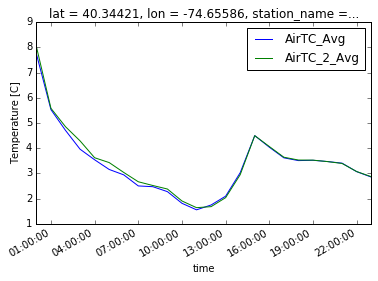

In [34]:
ds.AirTC_Avg.sel(time='2016-02-23').plot()
ds.AirTC_2_Avg.sel(time='2016-02-23').plot()
plt.ylabel('Temperature [C]')
plt.legend(loc='upper right');

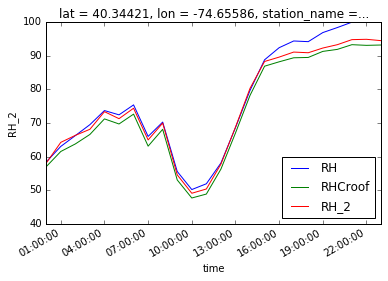

In [27]:
ds.RH.sel(time='2016-02-23').plot()
ds.RHCroof.sel(time='2016-02-23').plot()
ds.RH_2.sel(time='2016-02-23').plot()
plt.legend(loc='lower right');

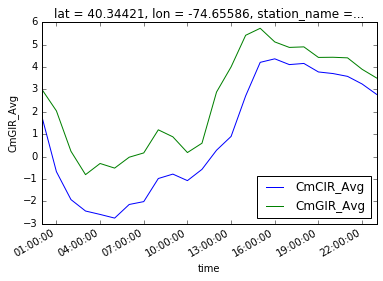

In [28]:
ds.CmCIR_Avg.sel(time='2016-02-23').plot()
ds.CmGIR_Avg.sel(time='2016-02-23').plot()
plt.legend(loc='lower right');